<a href="https://colab.research.google.com/github/motoroko/machinelearning/blob/master/TubesRandomWalk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Functions

In [0]:
def moving(individu):
  for i in individu: 
    if i[3] > 0:
      i[3] = i[3] - 1
    if i[3] == 0:
      i[2] = False
    if random.randint(0, 101) <= moveprob:
      val = random.randint(1, 5)
      if val == 1:
        if ( i[0] + 1 ) <= 20: 
          i[0] = i[0] + 1
          i[1] = i[1]
      elif val == 2:
        if ( i[0] - 1 ) >= 0:
          i[0] = i[0] - 1
          i[1] = i[1]
      elif val == 3:
        if ( i[1] + 1 ) <= 20:
          i[0] = i[0] 
          i[1] = i[1] + 1
      else: 
        if ( i[1] - 1 ) >= 0:
          i[0] = i[0]
          i[1] = i[1] - 1
          
  return individu

In [0]:
def infecting(individu):
  for j in individu:
    for i in individu:
      if j[0] == i[0] and j[1] == i[1]:
        if j[2] and not i[2]:
          if not i[4]:
            i[2] = True
            i[3] = 10
            i[4] = True
        if not j[2] and i[2]:
          if not j[4]:
            j[2] = True
            j[3] = 10
            j[4] = True
            
  return individu

In [0]:
def historys(individu,infect,healthy,pathx,pathy,temp1,temp2,temp3,temp4,temp5,temp6):
  for i in individu:
    temp5.append(i[0])
    temp6.append(i[1])
    if i[2] == True:
      temp1.append(i[0])
      temp2.append(i[1])
    else:
      temp3.append(i[0])
      temp4.append(i[1])
  infect.append([temp1,temp2])
  healthy.append([temp3,temp4])
  pathx.append(temp5)
  pathy.append(temp6)

  return infect,healthy,pathx,pathy

In [0]:
def play(individu,cured,n,infect,healthy,pathx,pathy,temp1,temp2,temp3,temp4,temp5,temp6):
  while(not cured):
    infect,healthy,temp1,temp2,temp3,temp4,temp5,temp6 = [],[],[],[],[],[],[],[]

    individu = moving(individu)
    individu = infecting(individu)

    infect,healthy,pathx,pathy = historys(individu,infect,healthy,pathx,pathy,temp1,temp2,temp3,temp4,temp5,temp6)

    #checking all cure
    cured = True
    for i in individu:
      if i[2]:
        cured = False
        break

    # plotting stuff:
    pylab.figure(dpi=250)
    pylab.title("Random Walk ( days " + str(n) + " )")
    pylab.plot(pathx, pathy, ':',LineWidth=0.6)
    pylab.scatter(healthy[0][0],healthy[0][1], marker='o',s=10)
    pylab.scatter(infect[0][0],infect[0][1], marker='*',s=30)
    pylab.savefig("rand_walk"+str(n)+".png",bbox_inches="tight",dpi=600) 
    pylab.show()
    n += 1 
  
  return 0

# Main Code

Inisiasi variable

In [0]:
%matplotlib inline

#jumlah iterasi / hari
n = 0 

#populasi
p = 200 

#status sembuh semua populasi
cured = False 

#probabilitas bergerak populasi
moveprob = 80

#probabilitas jumlah populasi yang terinfeksi
infectratio = round(0.05*p) 

#Inisiasi List
individu,pathx,pathy = [],[],[]
infect,healthy,temp1,temp2,temp3,temp4,temp5,temp6 = [],[],[],[],[],[],[],[]

Generate individu

In [0]:
for i in range(p):
  individu.append([randint(0,21),randint(0,21),False,0,False])

for i in range(infectratio):
  individu[i][2] = True
  individu[i][3] = 10
  individu[i][4] = True
  
individu = infecting(individu)
infect,healthy,pathx,pathy = historys(individu,infect,healthy,pathx,pathy,temp1,temp2,temp3,temp4,temp5,temp6)

# Simulasi

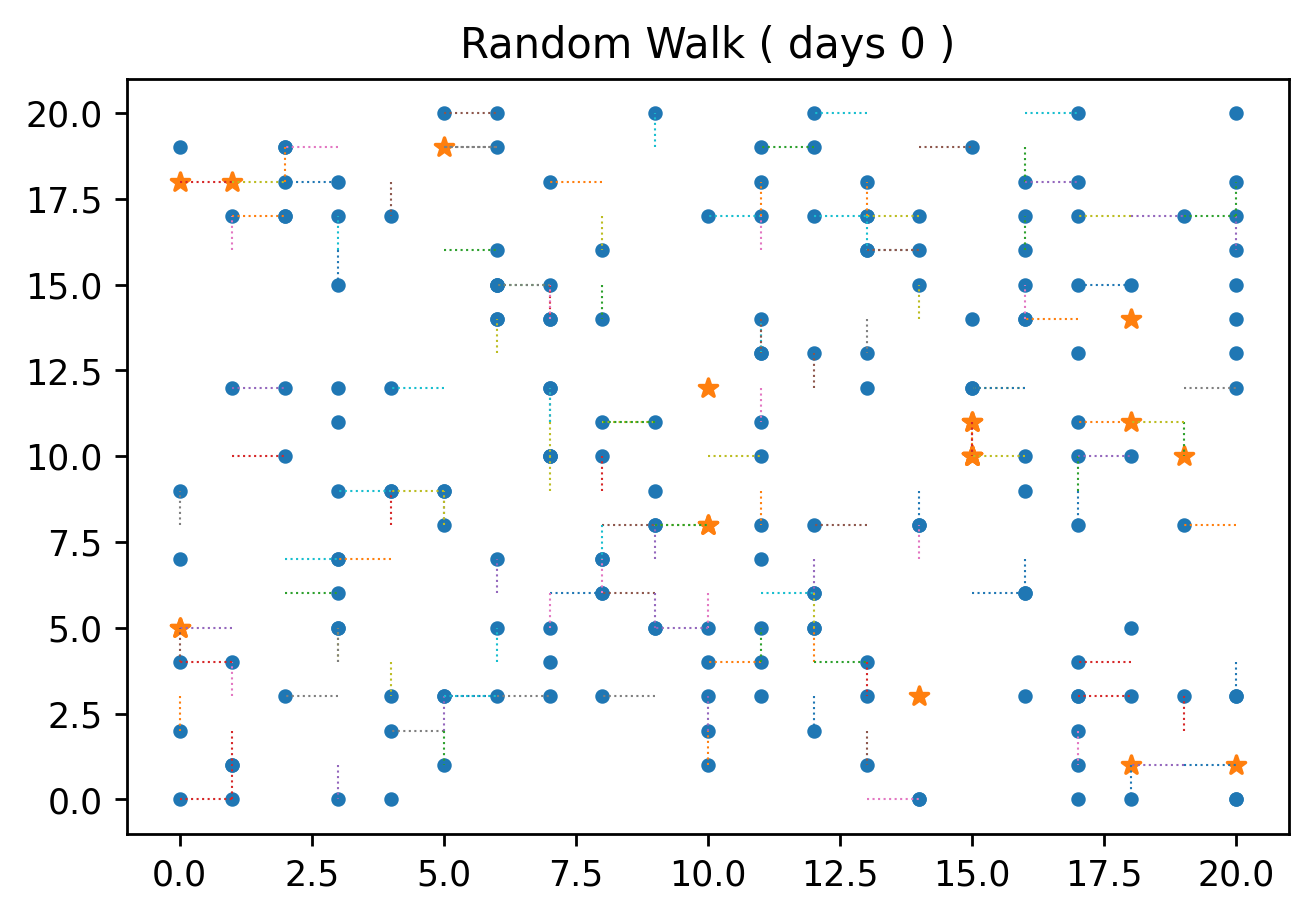

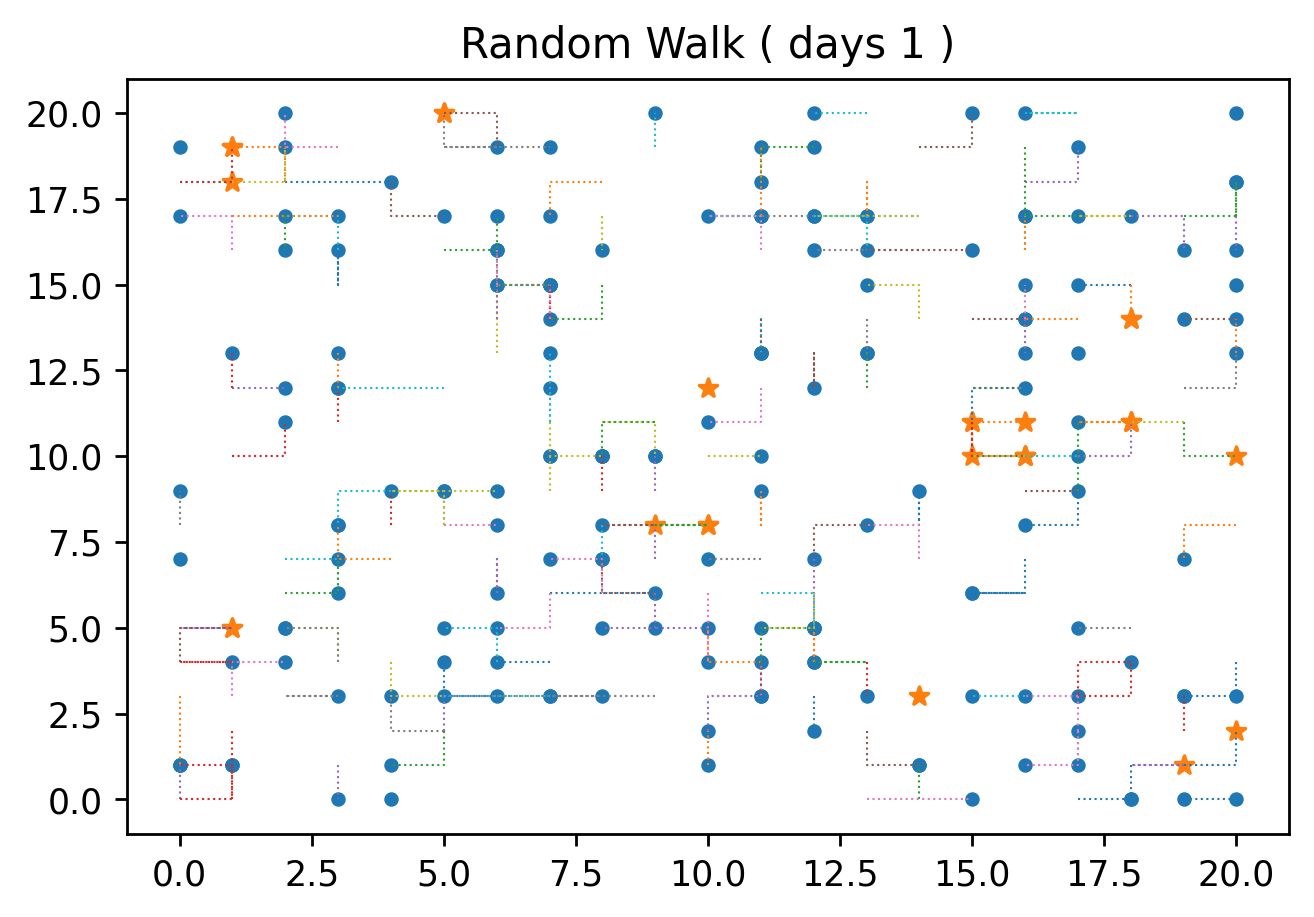

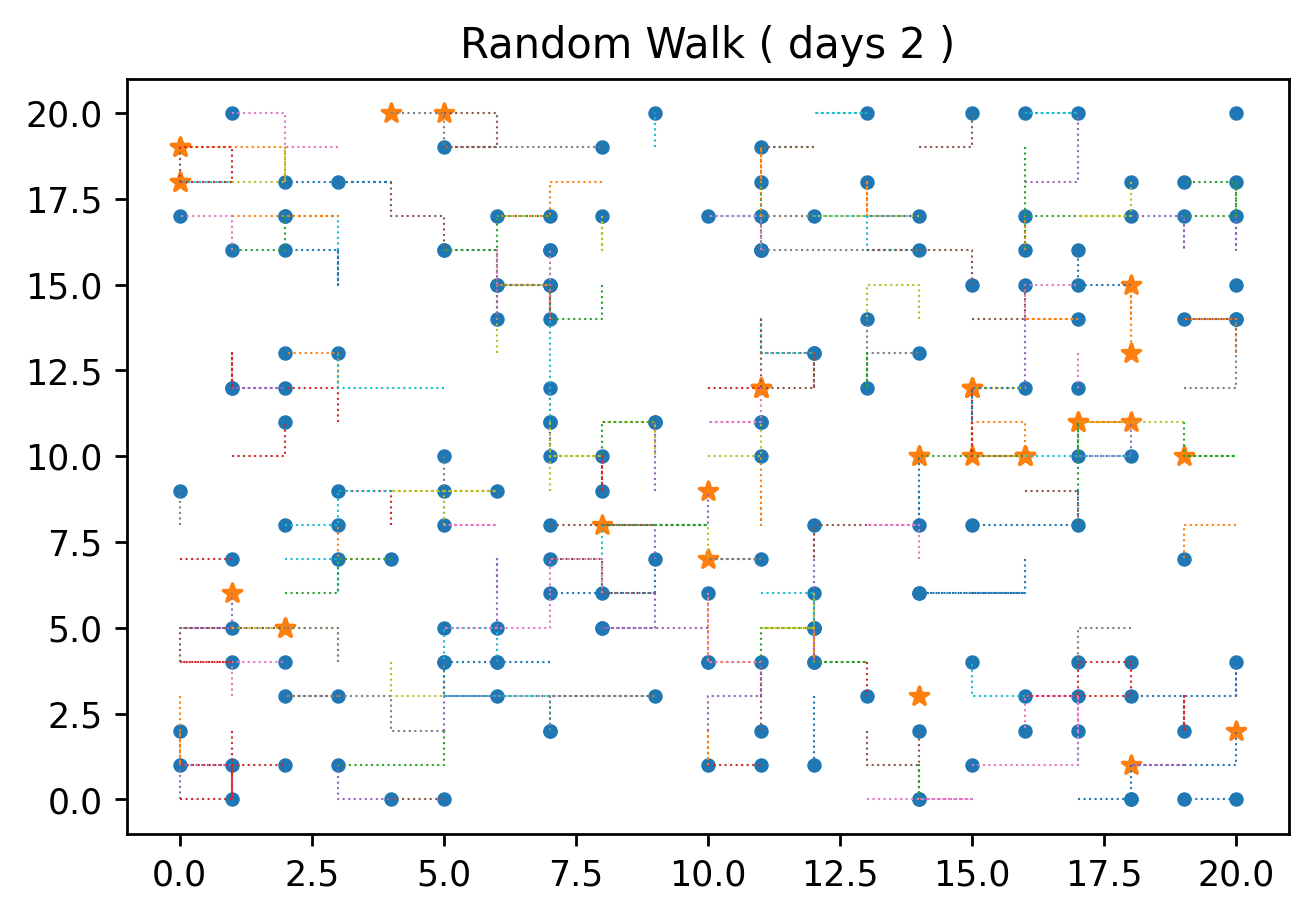

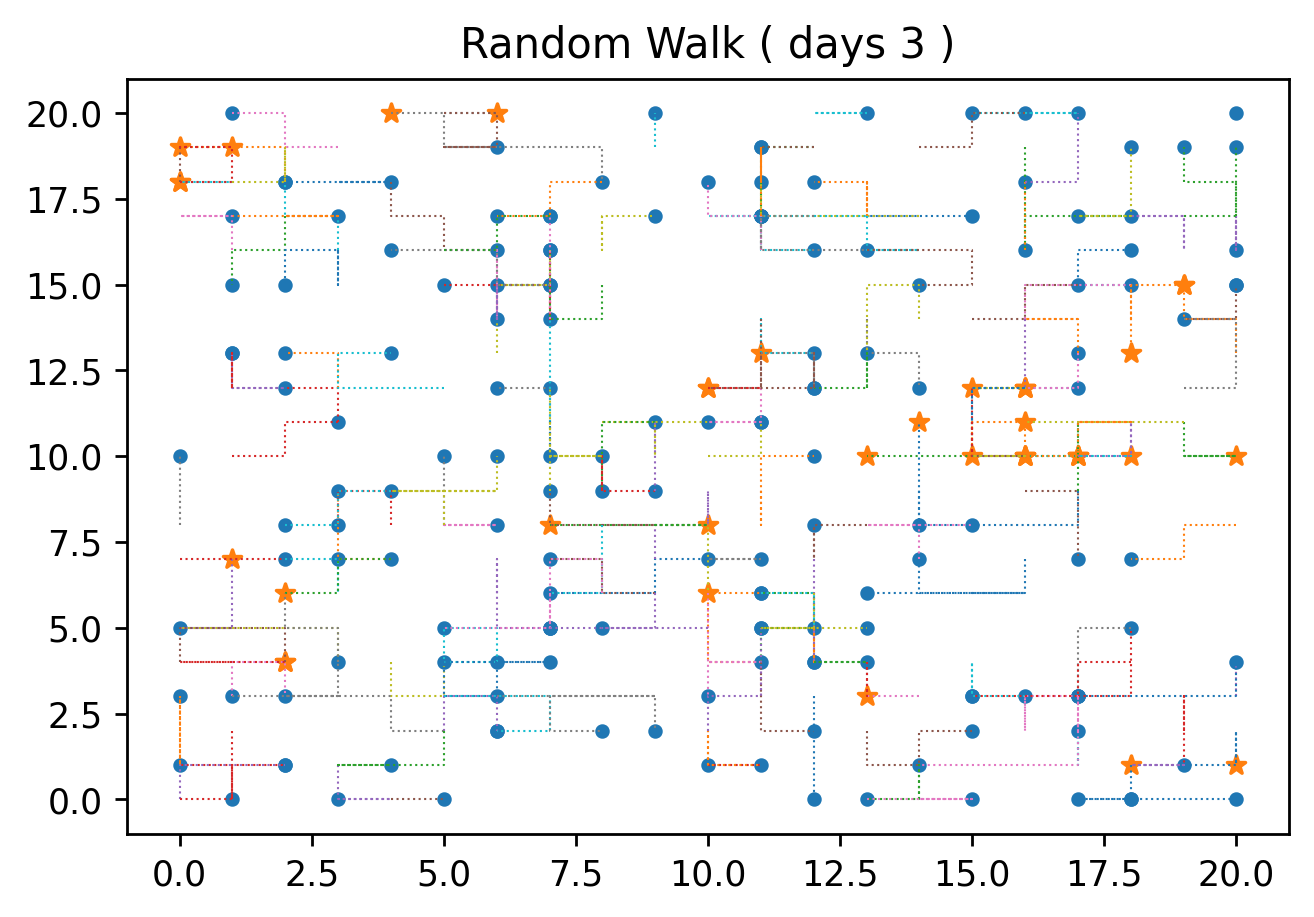

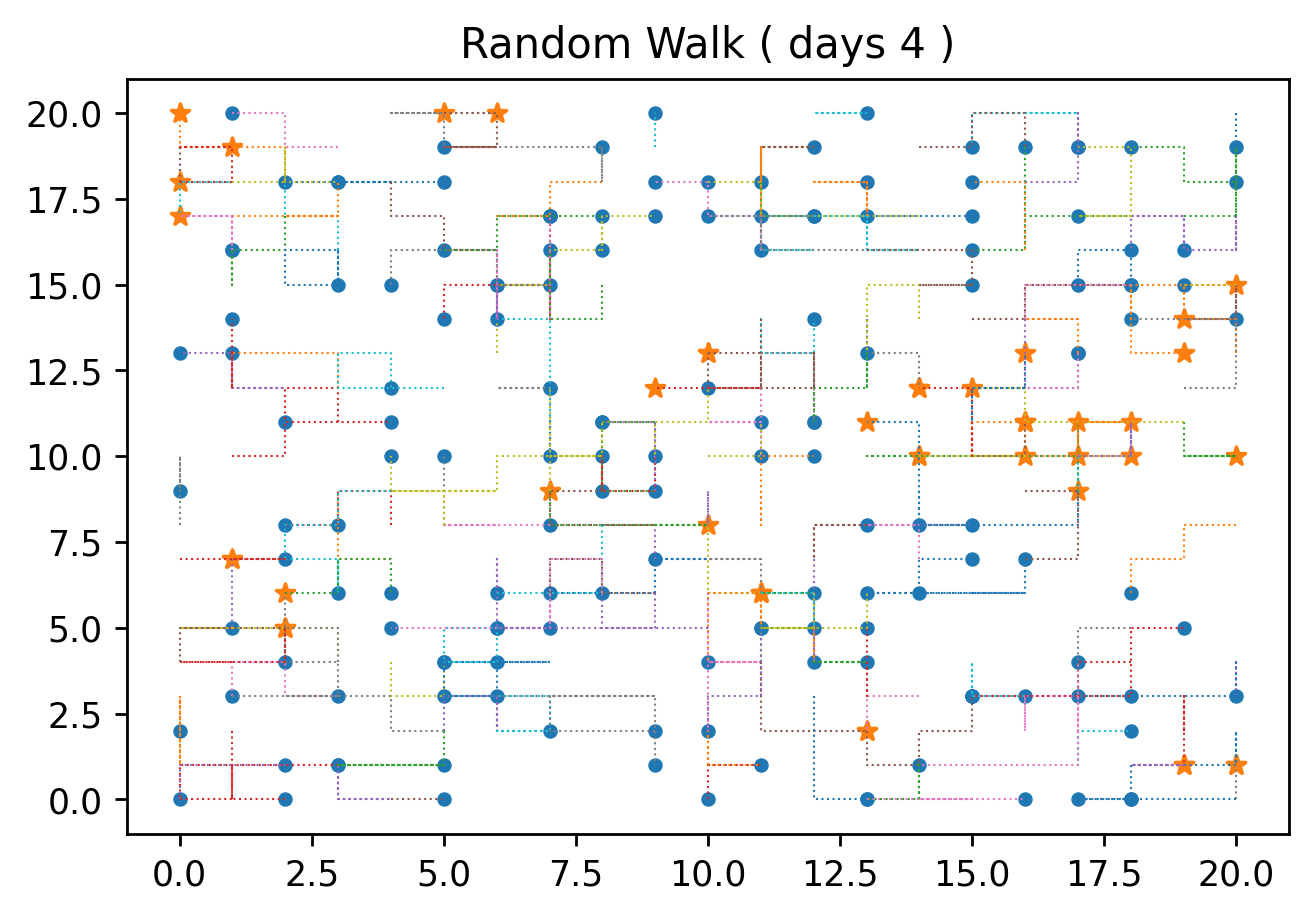

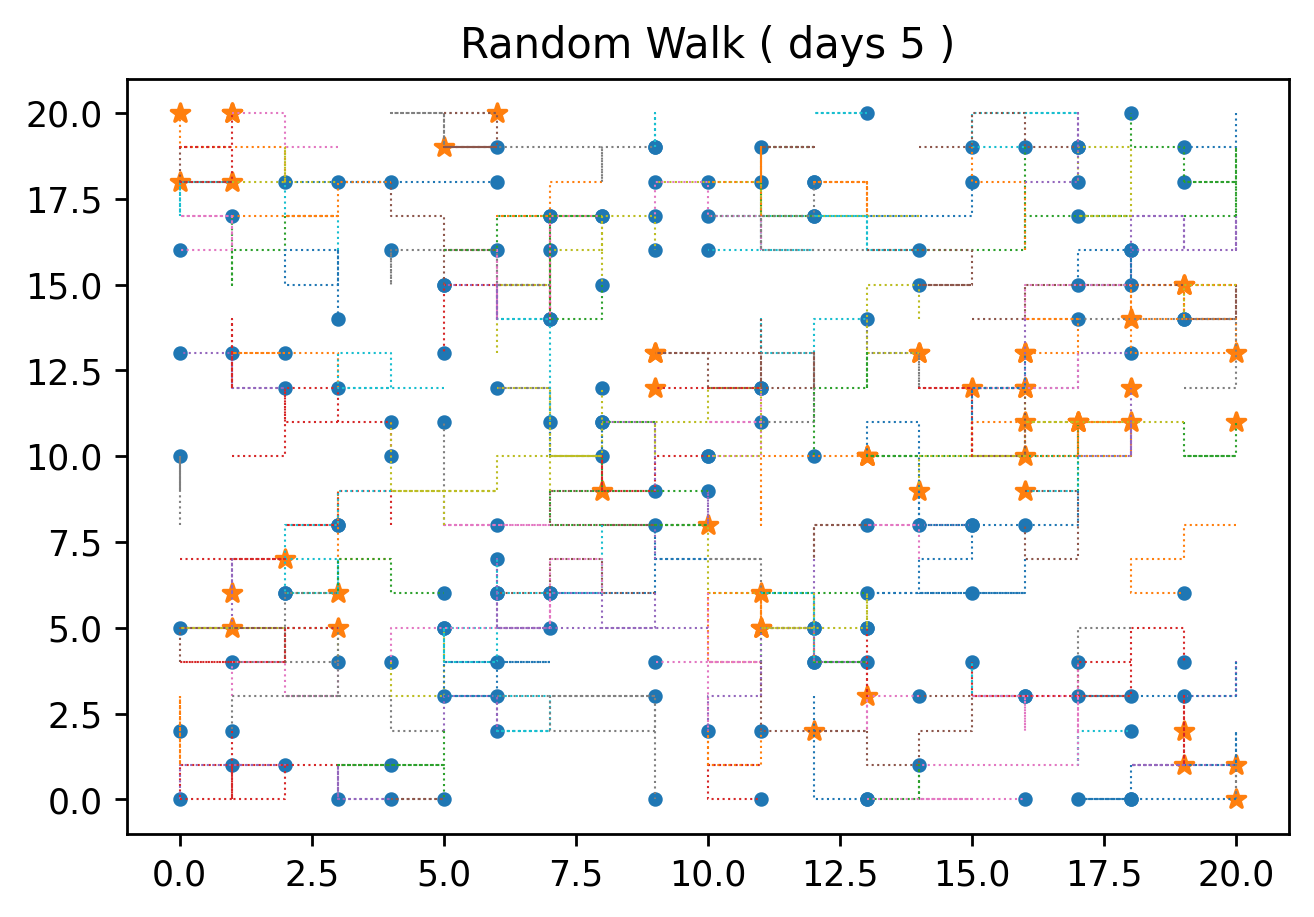

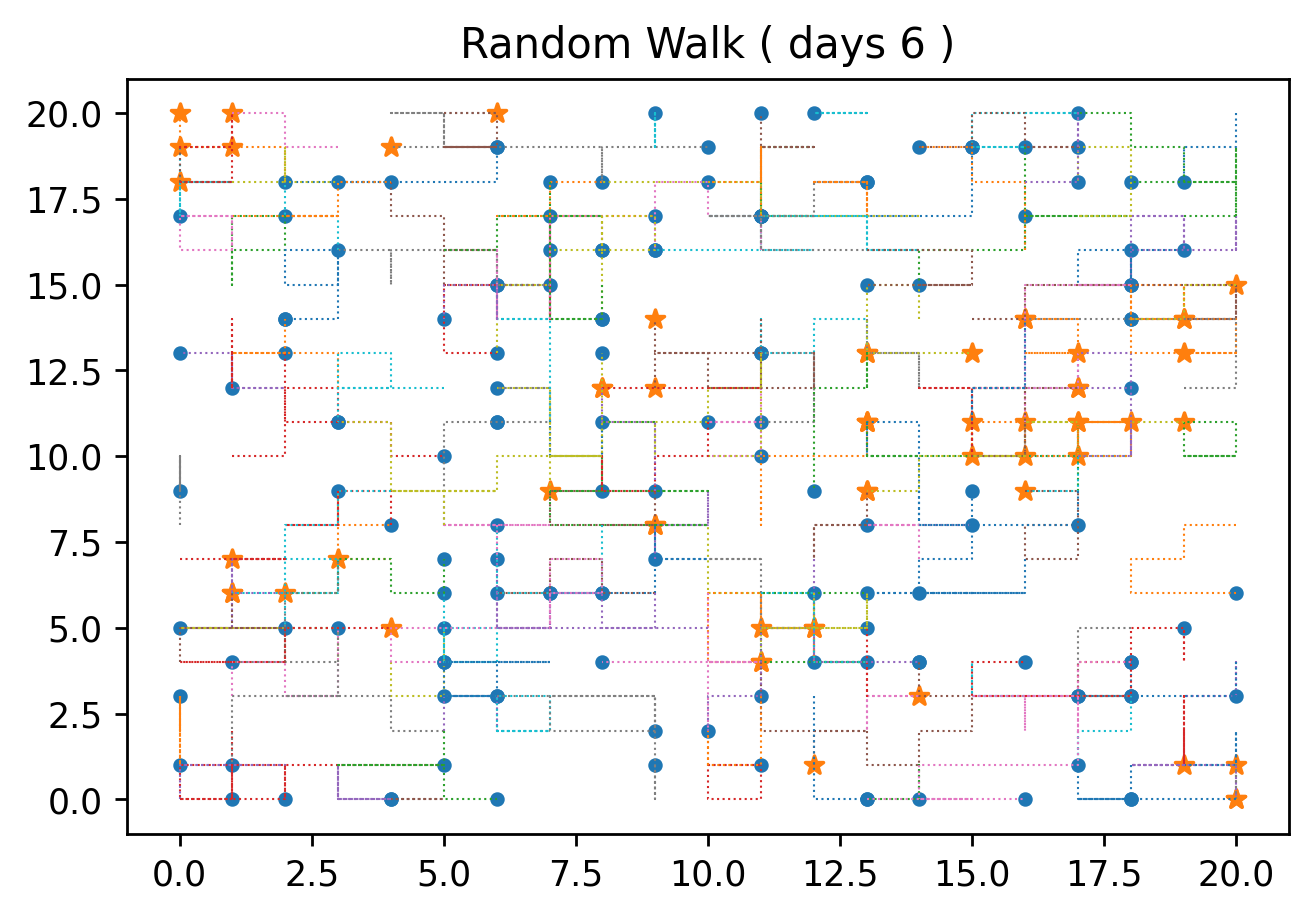

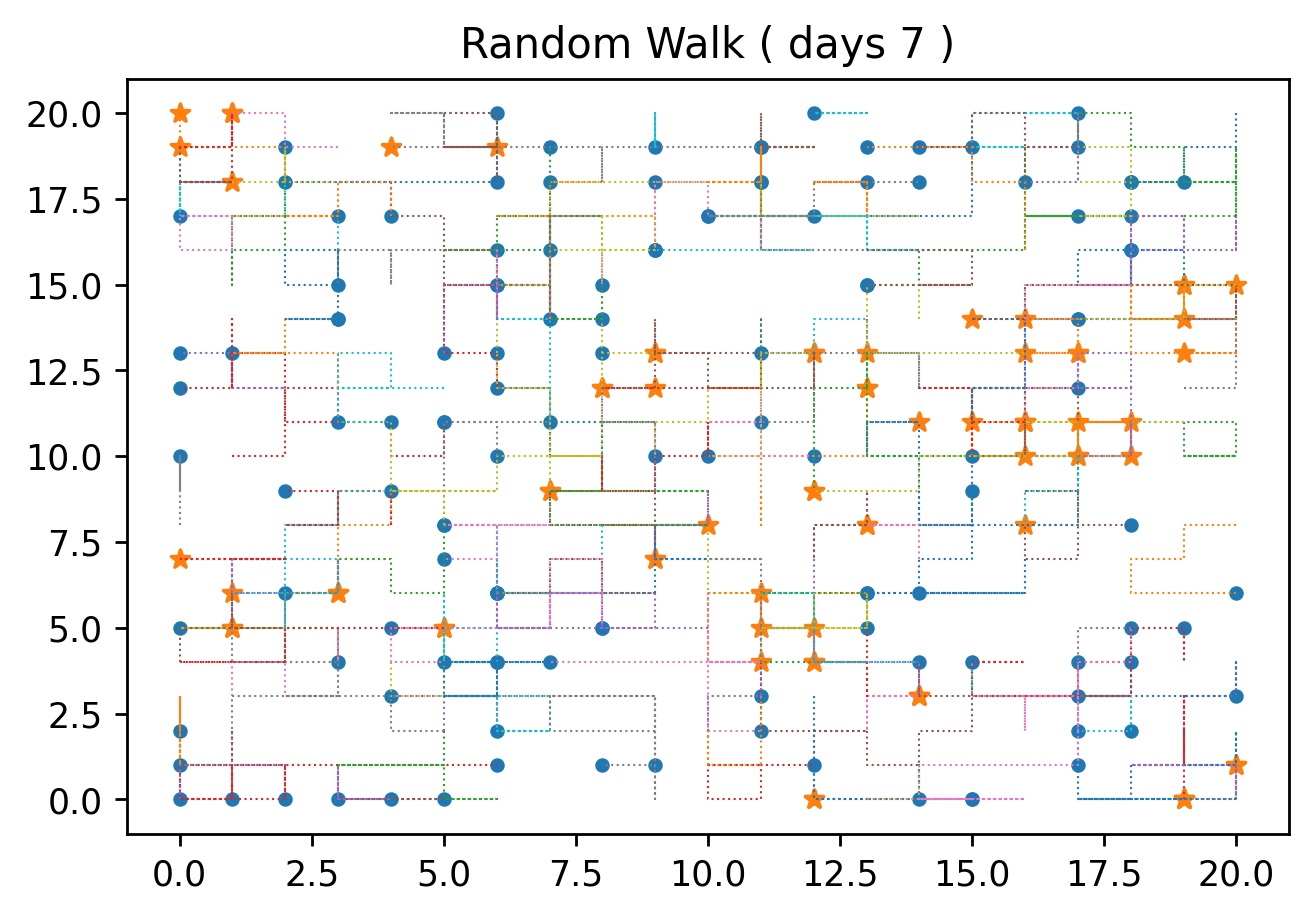

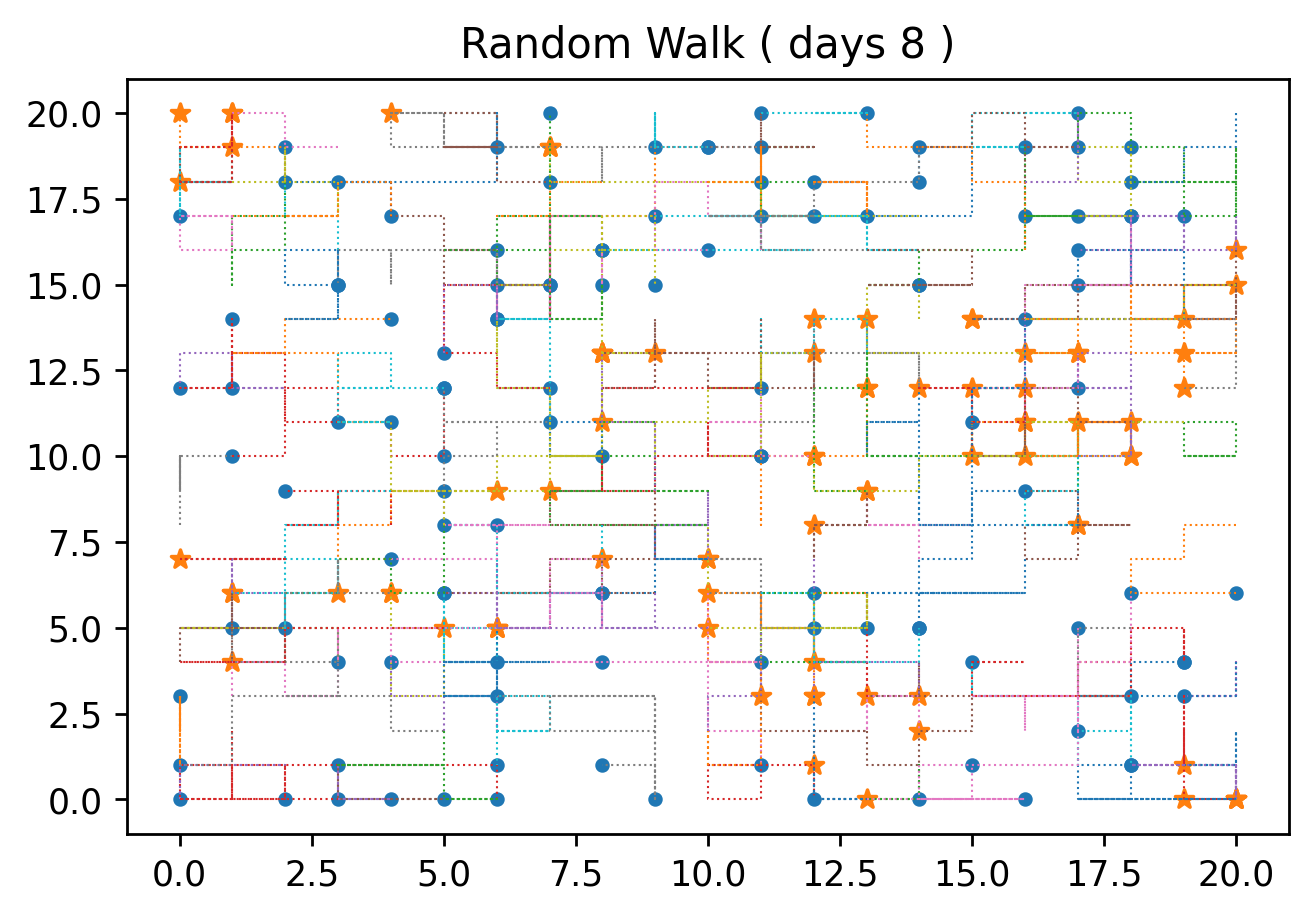

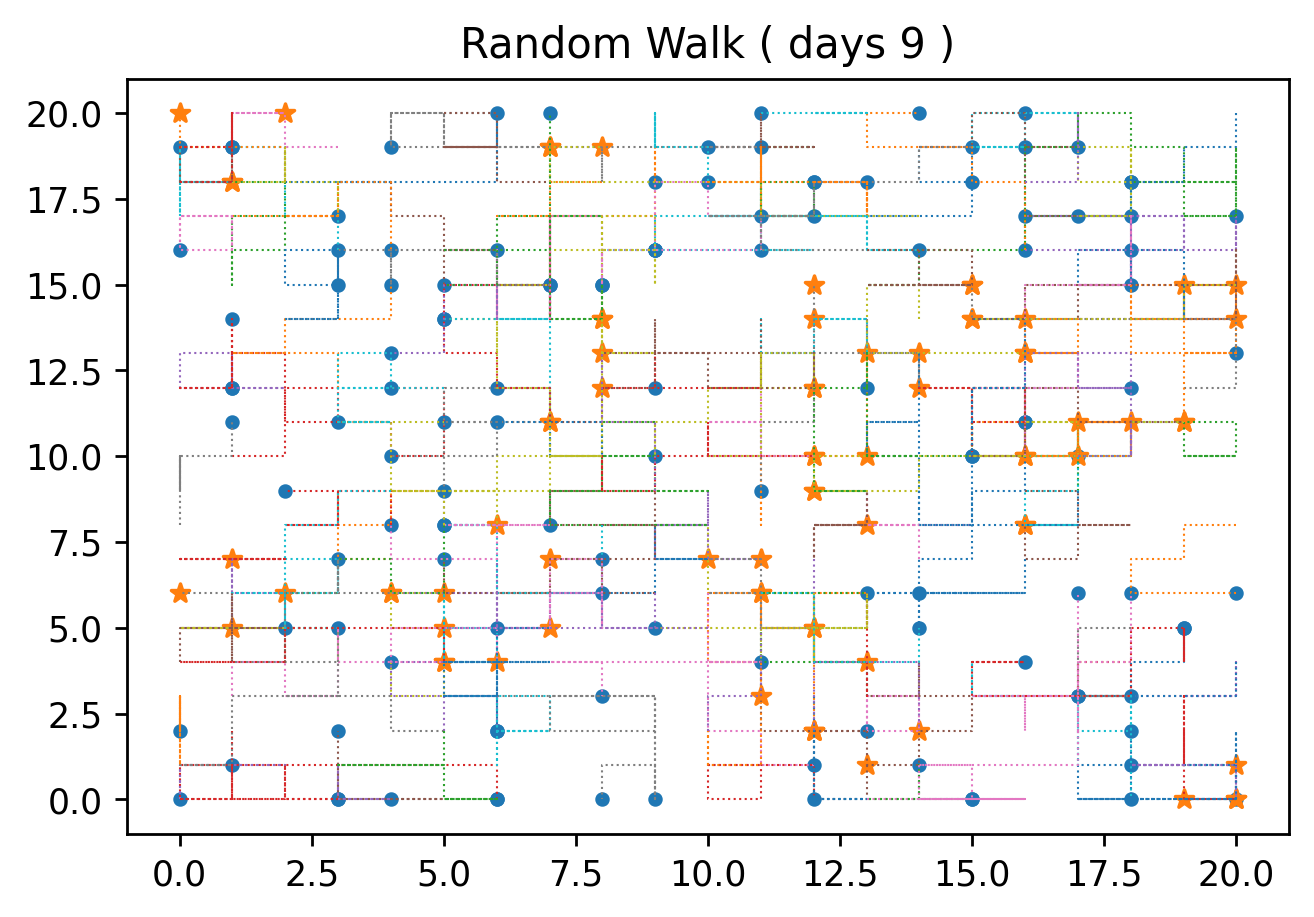

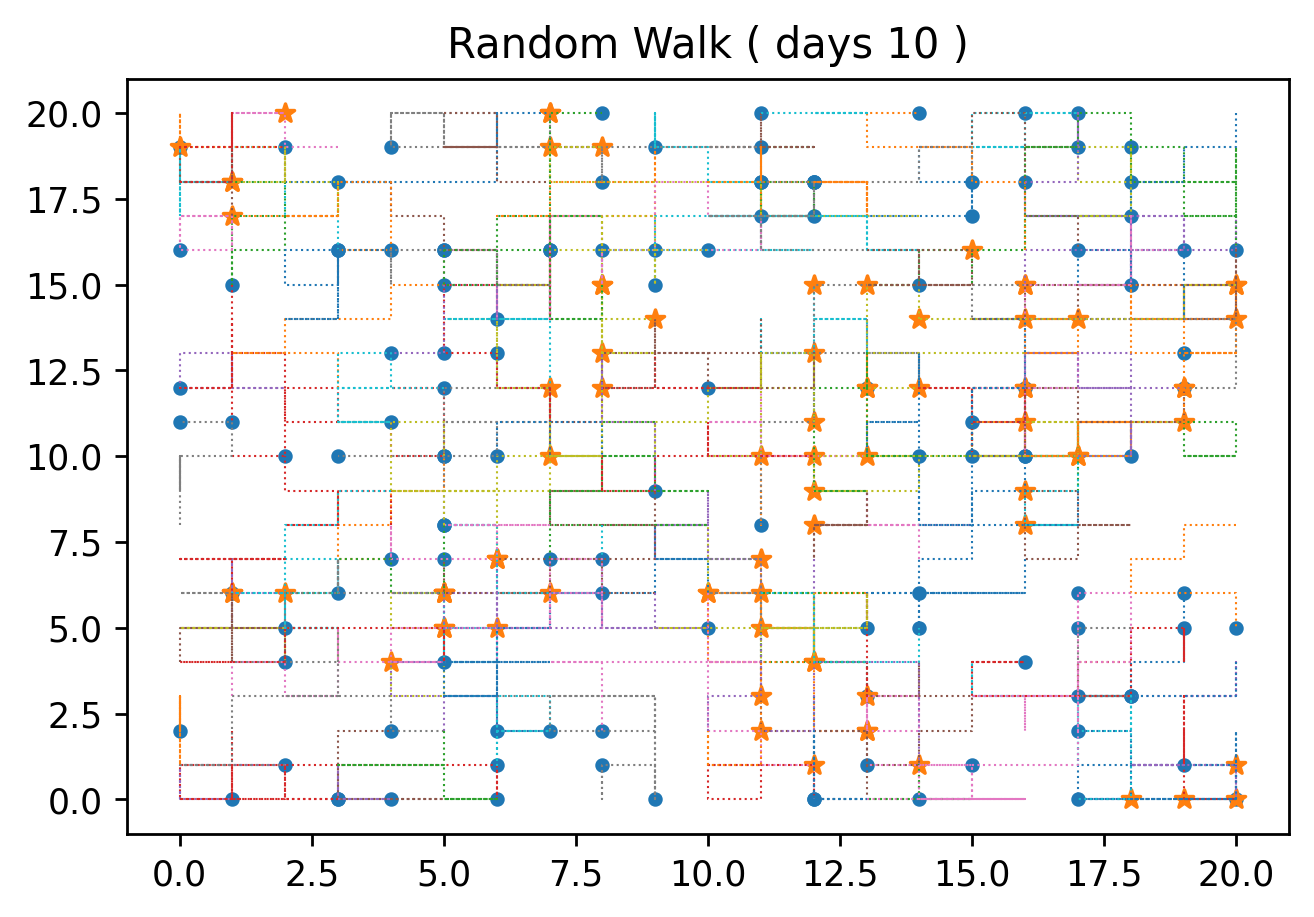

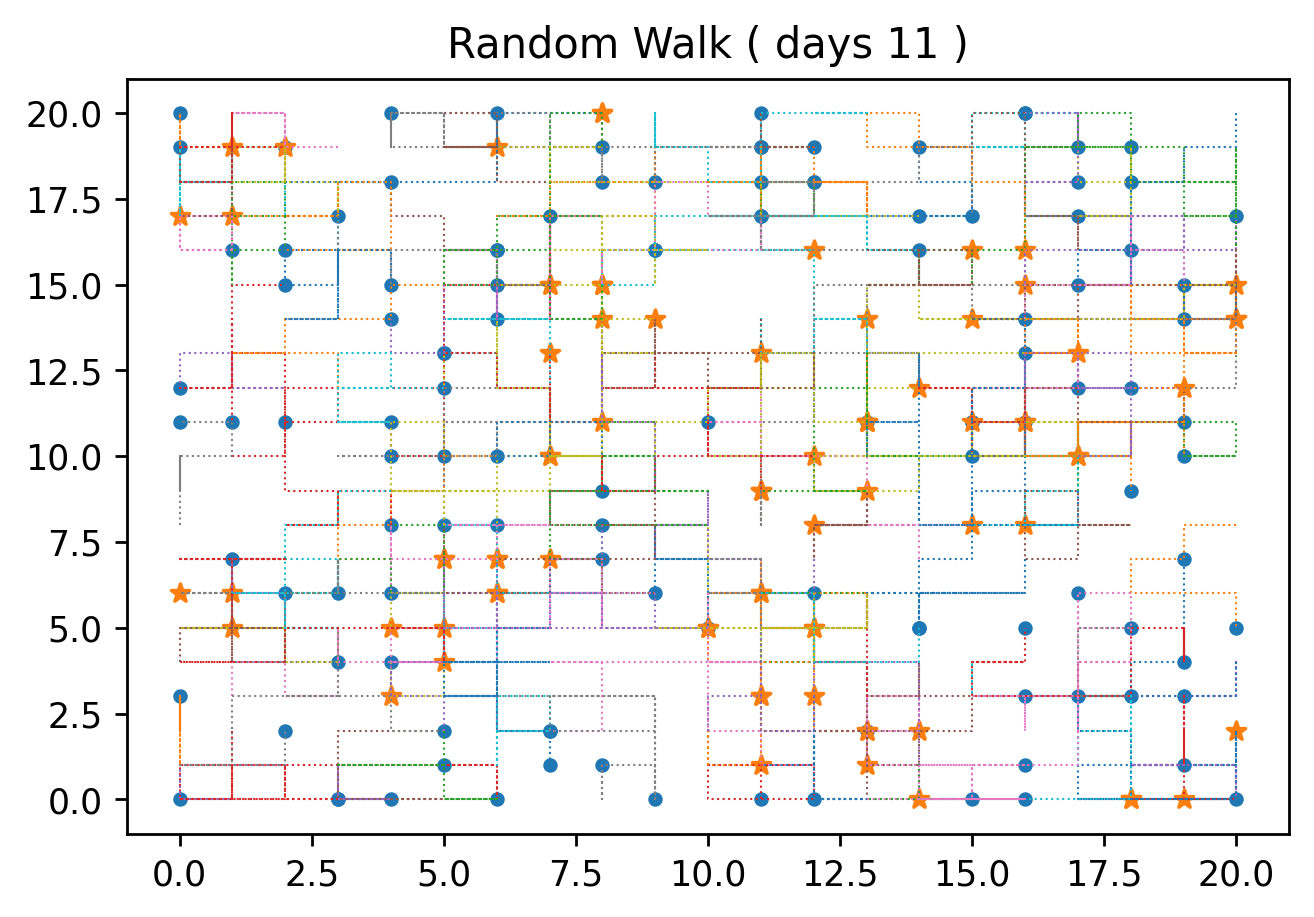

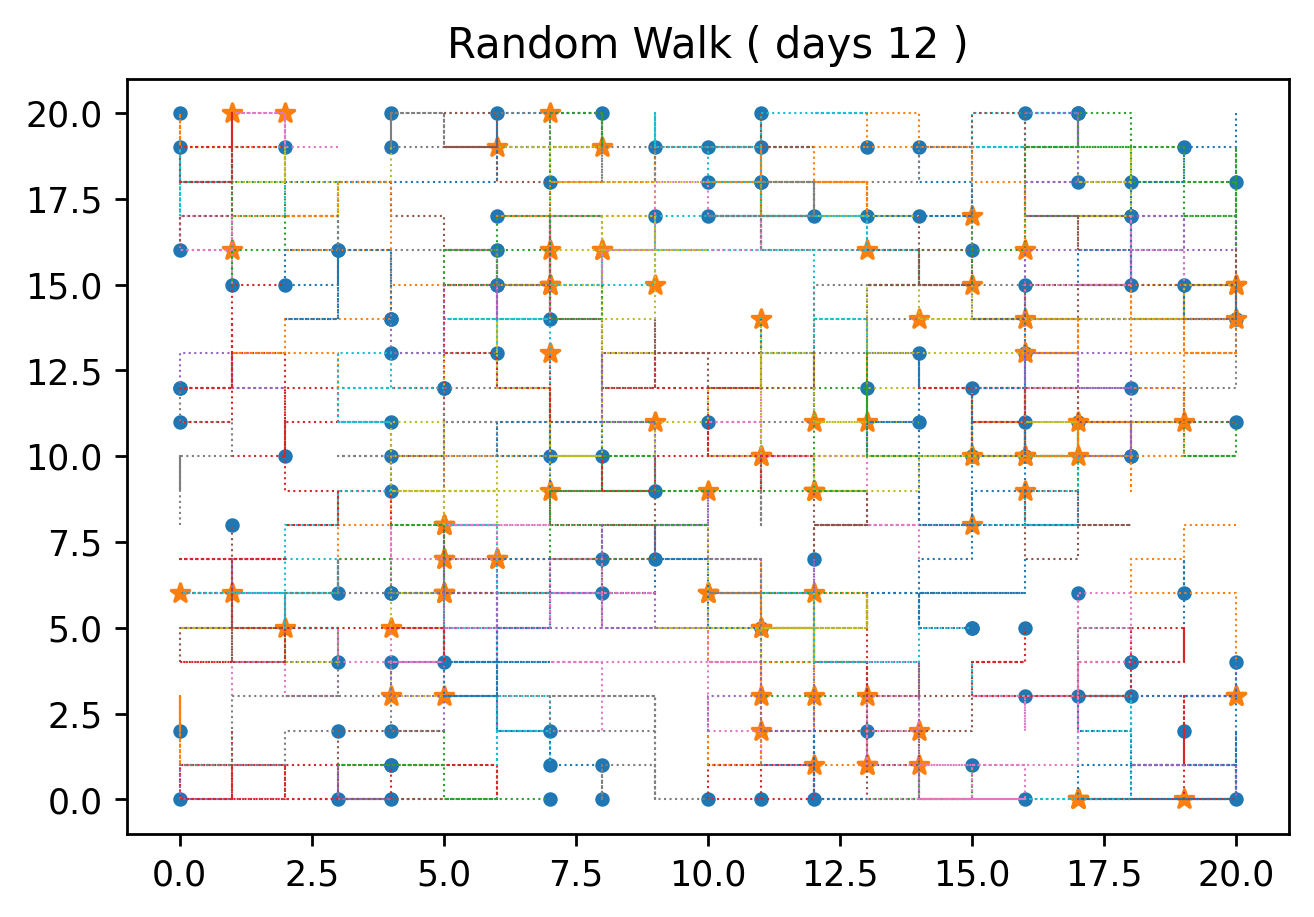

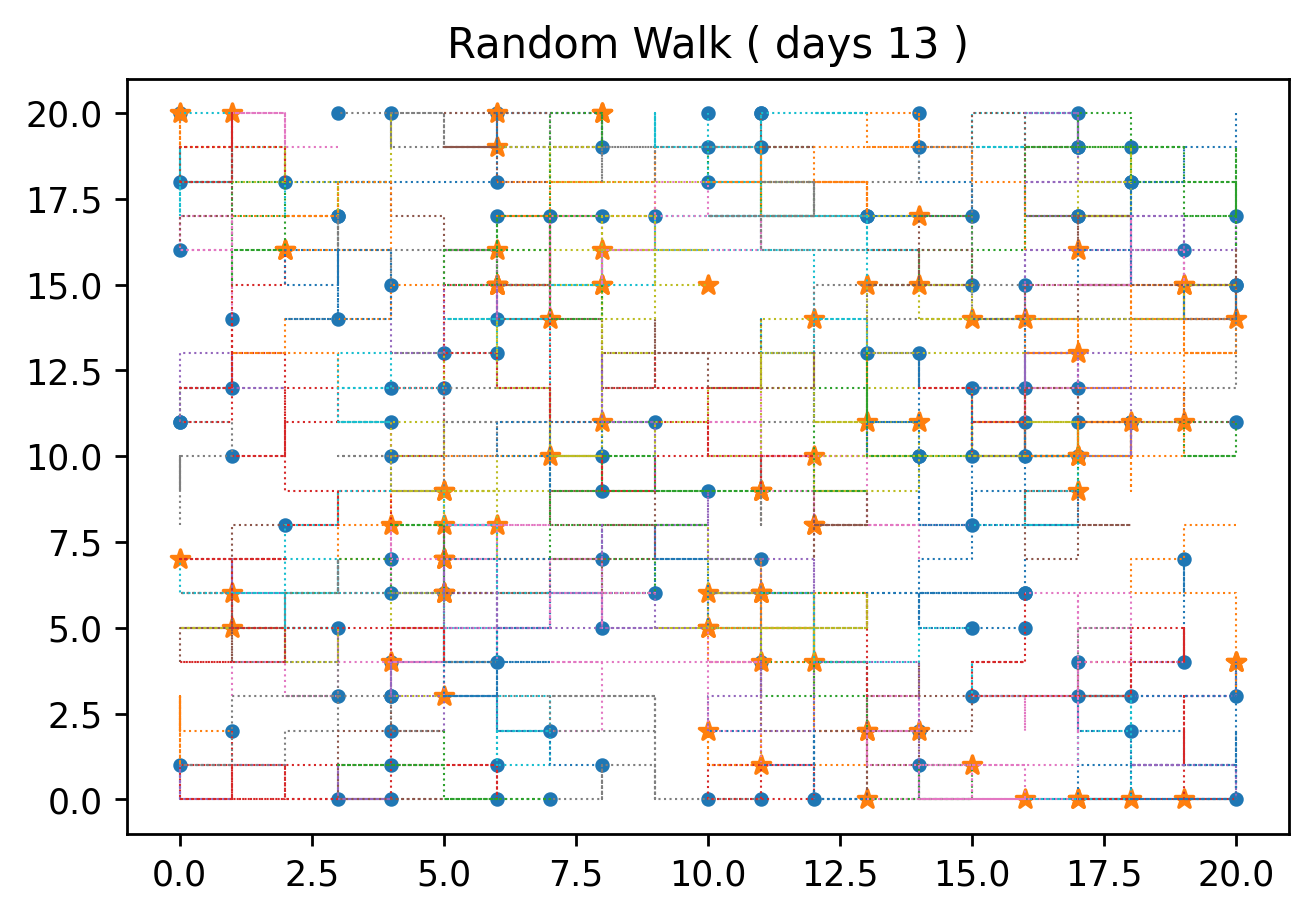

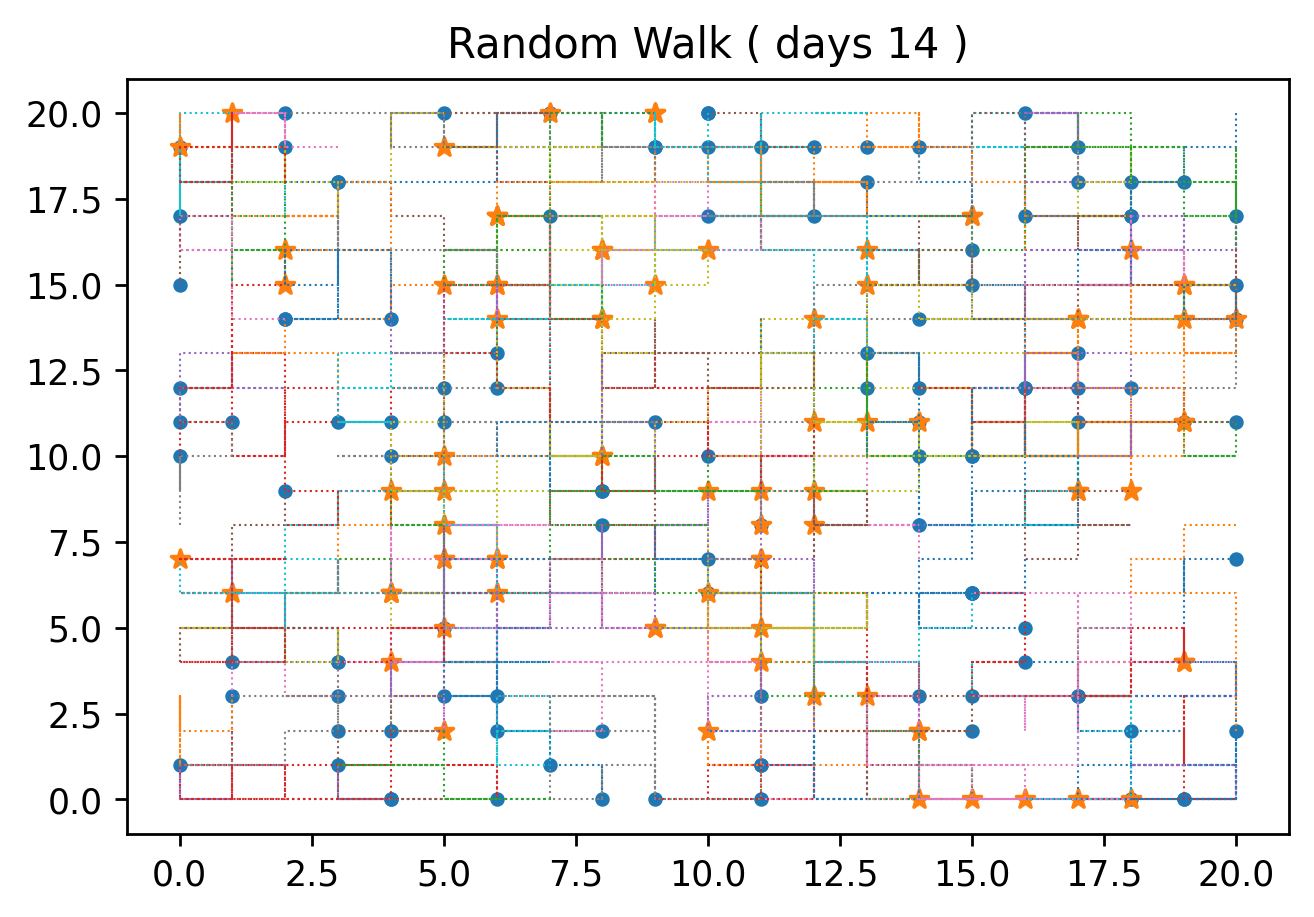

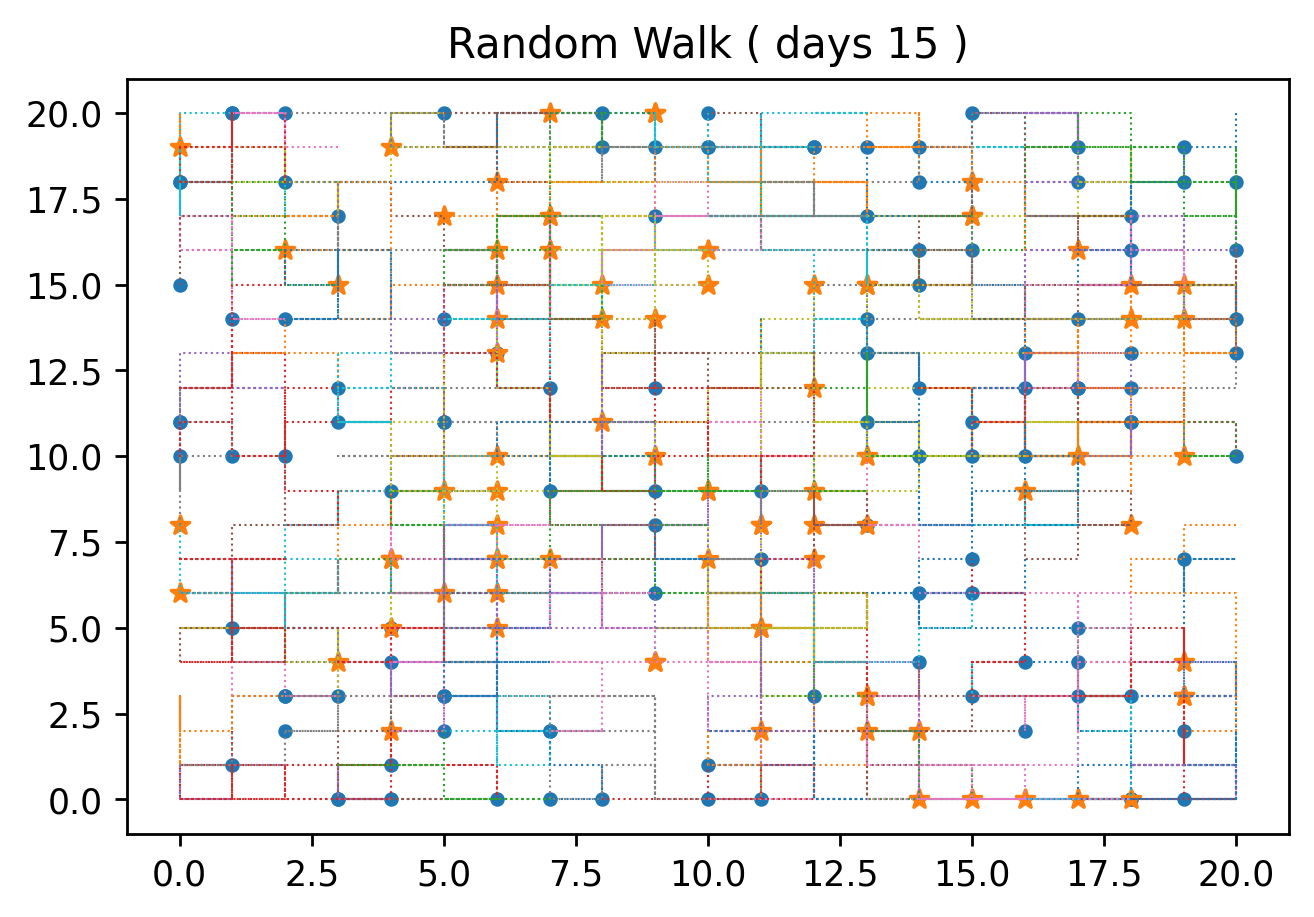

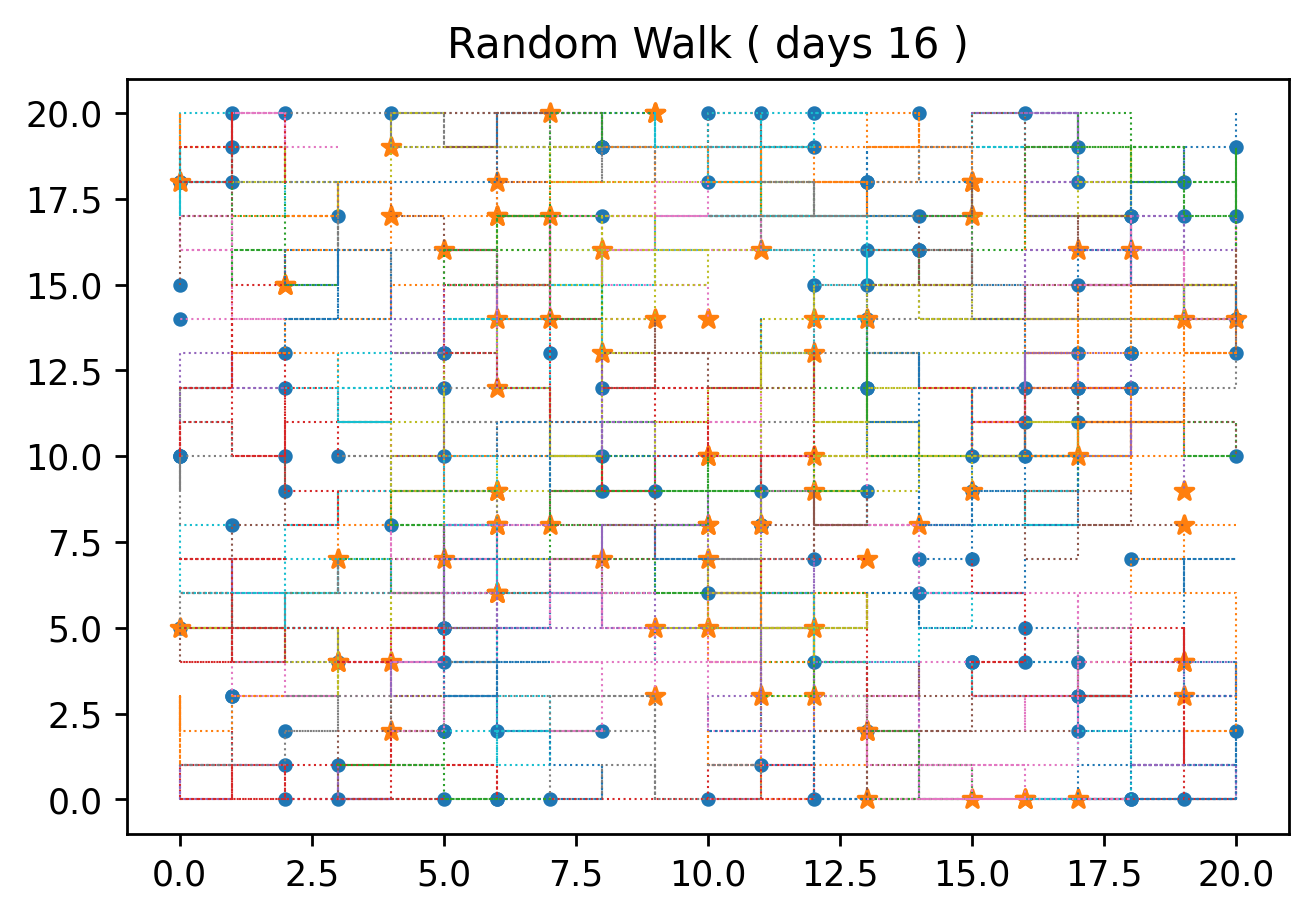

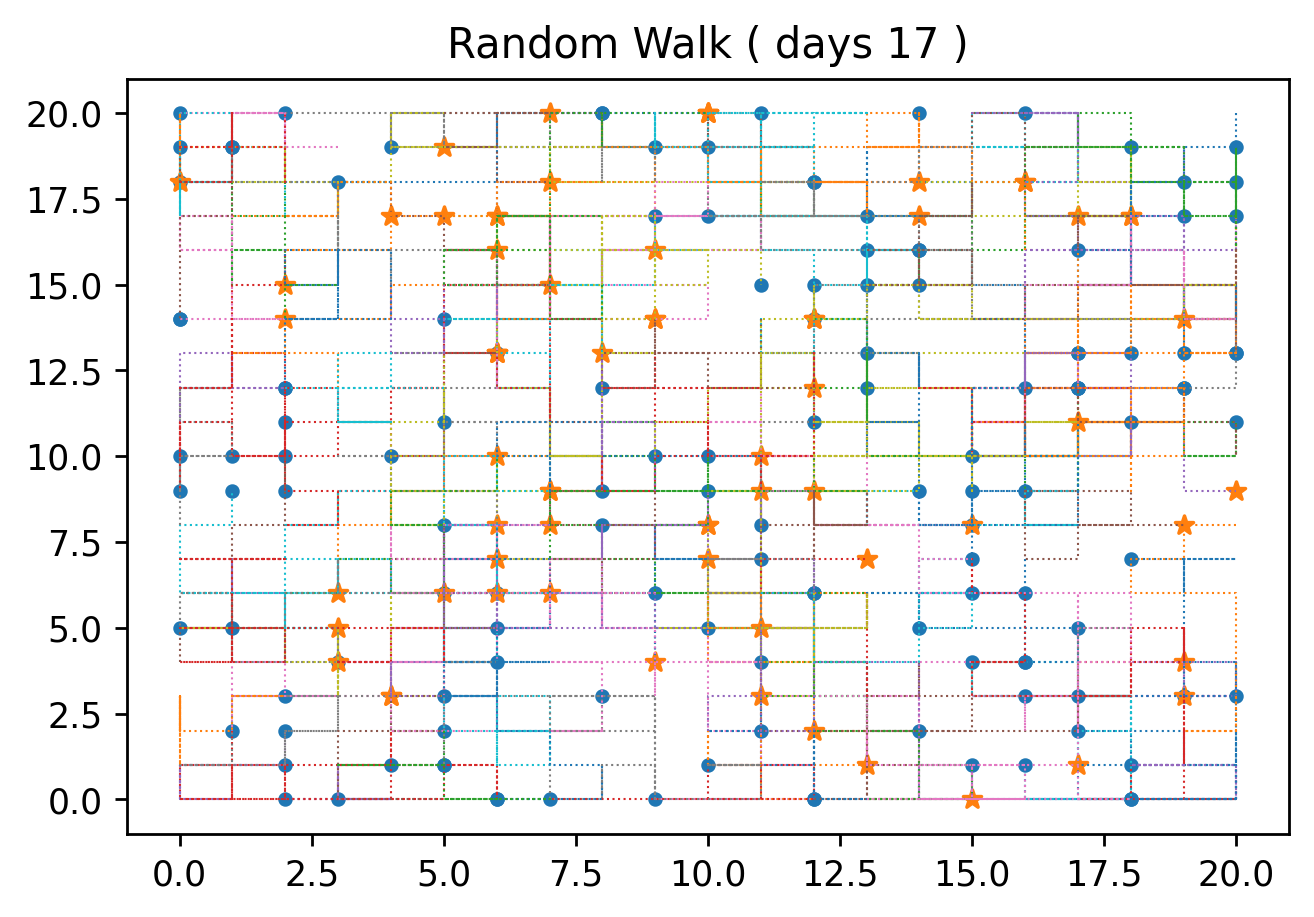

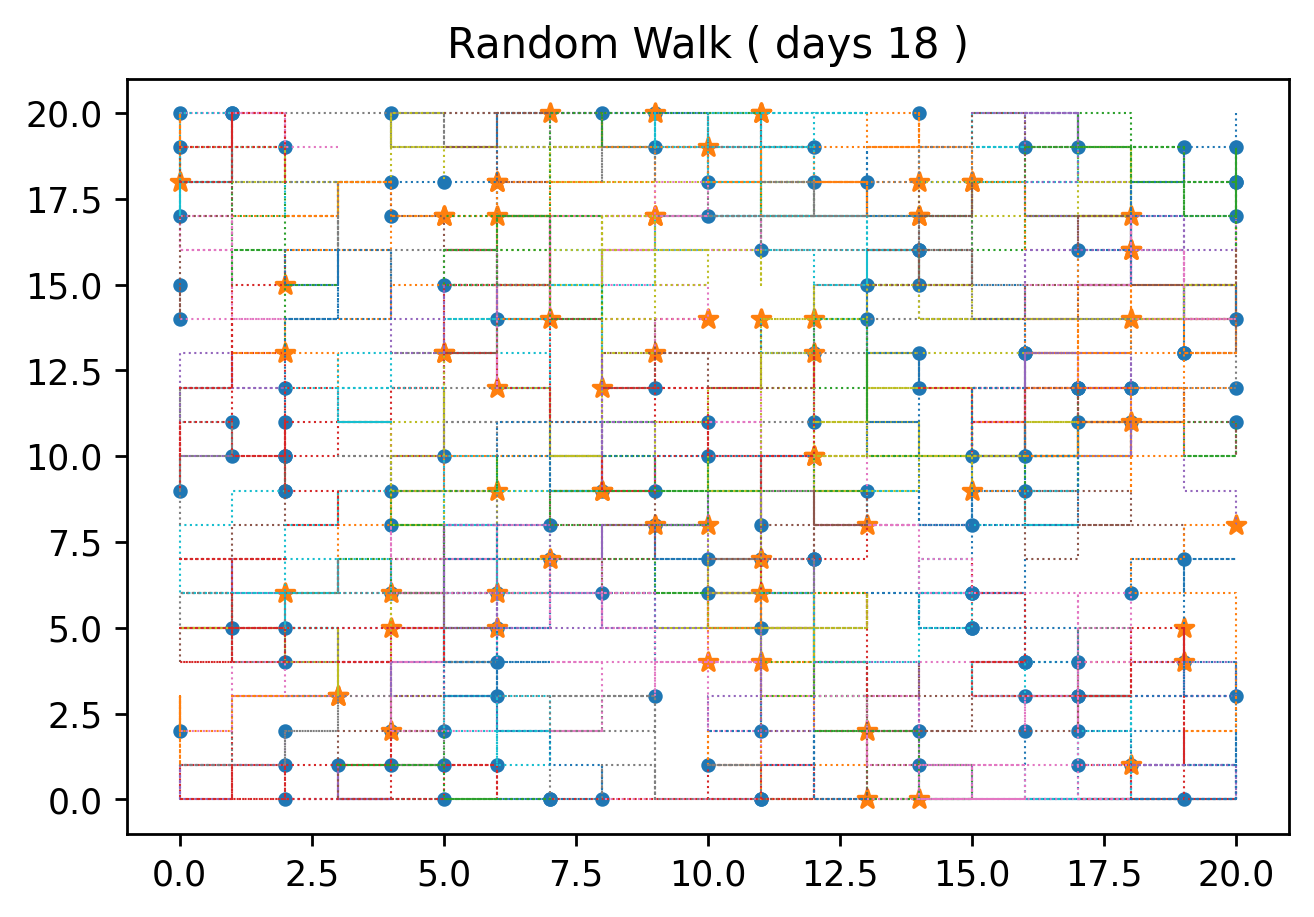

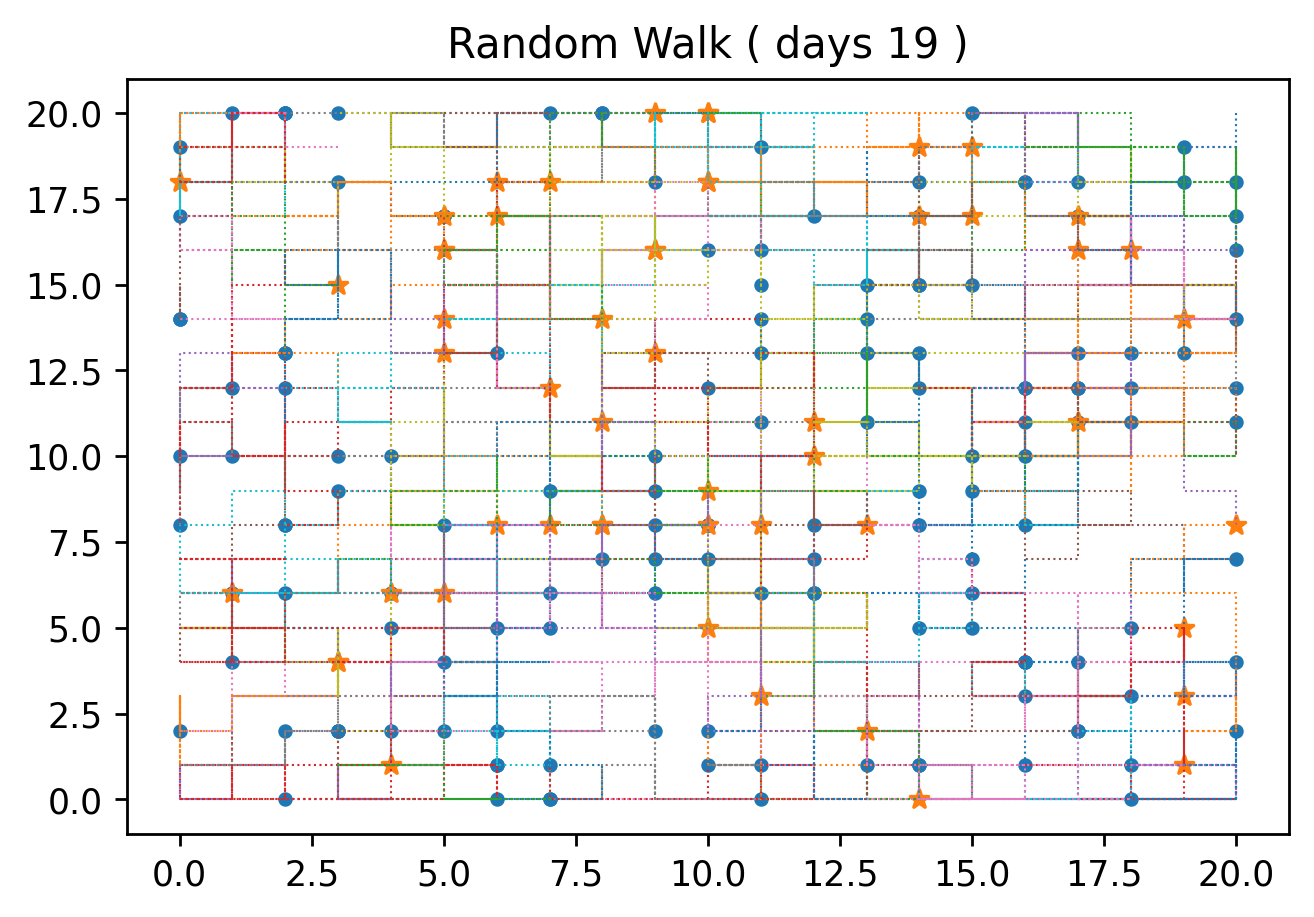

In [0]:
play(individu,cured,n,infect,healthy,pathx,pathy,temp1,temp2,temp3,temp4,temp5,temp6)